In [76]:
import numpy as np

In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
import pandas as pd


In [80]:
import matplotlib.pyplot as plt

In [81]:
import seaborn as sns

In [82]:
import scipy.stats as stats

In [83]:
# Load the dataset
path="/content/drive/MyDrive/dataset/movies.csv"
movies_df = pd.read_csv(path)

# Display the first few rows
print("First 5 rows of the dataset:")
print(movies_df.head())



First 5 rows of the dataset:
                                MOVIES         YEAR  \
0                        Blood Red Sky        -2021   
1  Masters of the Universe: Revelation     (2021– )   
2                     The Walking Dead  (2010–2022)   
3                       Rick and Morty     (2013– )   
4                      Army of Thieves        -2021   

                                        GENRE  RATING  \
0      \nAction, Horror, Thriller                 6.1   
1  \nAnimation, Action, Adventure                 5.0   
2       \nDrama, Horror, Thriller                 8.2   
3  \nAnimation, Adventure, Comedy                 9.2   
4         \nAction, Crime, Horror                 NaN   

                                            ONE-LINE  \
0  \nA woman with a mysterious illness is forced ...   
1  \nThe war for Eternia begins again in what may...   
2  \nSheriff Deputy Rick Grimes wakes up from a c...   
3  \nAn animated series that follows the exploits...   
4  \nA prequel, s

In [84]:
# Get summary information about the dataset
print("\nDataset Info:")
print(movies_df.info())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    99 non-null     object 
 1   YEAR      99 non-null     object 
 2   GENRE     99 non-null     object 
 3   RATING    97 non-null     float64
 4   ONE-LINE  99 non-null     object 
 5   STARS     99 non-null     object 
 6   VOTES     97 non-null     object 
 7   RunTime   94 non-null     float64
 8   Gross     3 non-null      object 
dtypes: float64(2), object(7)
memory usage: 70.4+ KB
None


In [85]:
# Get summary statistics for numeric columns
print("\nSummary Statistics:")
print(movies_df.describe())


Summary Statistics:
          RATING     RunTime
count  97.000000   94.000000
mean    7.744330   60.957447
std     1.085124   45.859279
min     3.300000   22.000000
25%     7.500000   42.000000
50%     8.100000   45.500000
75%     8.500000   60.000000
max     9.400000  395.000000


In [86]:
# 1. Clean the 'YEAR' column: Remove non-numeric characters (parentheses) and convert to numeric
movies_df['YEAR'] = movies_df['YEAR'].str.replace('(', '').str.replace(')', '')
movies_df['YEAR'] = pd.to_numeric(movies_df['YEAR'], errors='coerce')

# 2. Clean the 'GENRE' column: Replace newlines and extra spaces manually
movies_df['GENRE'] = movies_df['GENRE'].apply(lambda x: x.replace('\n', '').replace('  ', ' ') if isinstance(x, str) else x)

# 3. Clean the 'ONE-LINE' column: Replace newlines and extra spaces manually
movies_df['ONE-LINE'] = movies_df['ONE-LINE'].apply(lambda x: x.replace('\n', '').replace('  ', ' ') if isinstance(x, str) else x)

# 4. Clean the 'STARS' column: Replace newlines and extra spaces manually
movies_df['STARS'] = movies_df['STARS'].apply(lambda x: x.replace('\n', '').replace('  ', ' ') if isinstance(x, str) else x)

# 5. Clean the 'VOTES' column: Remove commas and convert to numeric
movies_df['VOTES'] = movies_df['VOTES'].str.replace(',', '')
movies_df['VOTES'] = pd.to_numeric(movies_df['VOTES'], errors='coerce')

# 6. Clean the 'Gross' column: Remove any non-numeric characters and convert to numeric
movies_df['Gross'] = movies_df['Gross'].str.replace('$', '').str.replace(',', '')
movies_df['Gross'] = pd.to_numeric(movies_df['Gross'], errors='coerce')

# 7. Handle missing values:
# - Drop rows where 'RATING' or 'RunTime' is missing
movies_df.dropna(subset=['RATING', 'RunTime'], inplace=True)

# - Fill missing 'YEAR', 'GENRE', and 'VOTES' with placeholders
movies_df['YEAR'].fillna(0, inplace=True)
movies_df['GENRE'].fillna('Unknown', inplace=True)
movies_df['VOTES'].fillna(0, inplace=True)

# Display the cleaned DataFrame
print("\nCleaned Data:")
print(movies_df.head())



Cleaned Data:
                                MOVIES    YEAR  \
0                        Blood Red Sky -2021.0   
1  Masters of the Universe: Revelation     0.0   
2                     The Walking Dead     0.0   
3                       Rick and Morty     0.0   
5                          Outer Banks     0.0   

                                GENRE  RATING  \
0      Action, Horror, Thriller           6.1   
1  Animation, Action, Adventure           5.0   
2       Drama, Horror, Thriller           8.2   
3  Animation, Adventure, Comedy           9.2   
5          Action, Crime, Drama           7.6   

                                            ONE-LINE  \
0  A woman with a mysterious illness is forced in...   
1  The war for Eternia begins again in what may b...   
2  Sheriff Deputy Rick Grimes wakes up from a com...   
3  An animated series that follows the exploits o...   
5  A group of teenagers from the wrong side of th...   

                                               STARS

In [87]:
# 1. Check for remaining missing values in the dataset
print("\nRemaining Missing Values in Each Column After Cleaning:")
print(movies_df.isnull().sum())

# 2. Check for any unrealistic values (e.g., 'YEAR' = 0, 'RATING' < 0 or > 10, 'VOTES' < 0)
print("\nRows with Year = 0 (placeholder):")
print(movies_df[movies_df['YEAR'] == 0])

print("\nRows with Invalid Ratings (<0 or >10):")
print(movies_df[(movies_df['RATING'] < 0) | (movies_df['RATING'] > 10)])

print("\nRows with Negative Votes:")
print(movies_df[movies_df['VOTES'] < 0])

# 3. Check data types to ensure columns are correctly formatted
print("\nData Types After Cleaning:")
print(movies_df.dtypes)

# 4. Check for duplicate rows (if MOVIES column represents unique titles)
print("\nDuplicate Rows (if any):")
duplicate_rows = movies_df[movies_df.duplicated()]
print(duplicate_rows)




Remaining Missing Values in Each Column After Cleaning:
MOVIES       0
YEAR         0
GENRE        0
RATING       0
ONE-LINE     0
STARS        0
VOTES        0
RunTime      0
Gross       94
dtype: int64

Rows with Year = 0 (placeholder):
                                 MOVIES  YEAR  \
1   Masters of the Universe: Revelation   0.0   
2                      The Walking Dead   0.0   
3                        Rick and Morty   0.0   
5                           Outer Banks   0.0   
7                                Dexter   0.0   
..                                  ...   ...   
92                               Gotham   0.0   
93                             Billions   0.0   
94               Agents of S.H.I.E.L.D.   0.0   
97                                Arrow   0.0   
98              Orange Is the New Black   0.0   

                                 GENRE  RATING  \
1   Animation, Action, Adventure           5.0   
2        Drama, Horror, Thriller           8.2   
3   Animation, Advent

In [88]:
# Reload the dataset (assuming duplicates were removed earlier)
movies_df = movies_df.copy()

#  Remove any remaining duplicate rows (just to ensure consistency)
movies_df = movies_df.drop_duplicates()

#  Remove duplicate columns, if any
movies_df = movies_df.loc[:, ~movies_df.columns.duplicated()]

# Display the cleaned dataset with duplicates removed
print("Data after cleaning (including removal of duplicate rows and columns):")
print(movies_df.head())

Data after cleaning (including removal of duplicate rows and columns):
                                MOVIES    YEAR  \
0                        Blood Red Sky -2021.0   
1  Masters of the Universe: Revelation     0.0   
2                     The Walking Dead     0.0   
3                       Rick and Morty     0.0   
5                          Outer Banks     0.0   

                                GENRE  RATING  \
0      Action, Horror, Thriller           6.1   
1  Animation, Action, Adventure           5.0   
2       Drama, Horror, Thriller           8.2   
3  Animation, Adventure, Comedy           9.2   
5          Action, Crime, Drama           7.6   

                                            ONE-LINE  \
0  A woman with a mysterious illness is forced in...   
1  The war for Eternia begins again in what may b...   
2  Sheriff Deputy Rick Grimes wakes up from a com...   
3  An animated series that follows the exploits o...   
5  A group of teenagers from the wrong side of th... 

In [89]:
# Descriptive statistics for numeric columns
print("\nDescriptive statistics for numeric columns:")
print(movies_df.describe())

# Descriptive statistics for categorical columns
print("\nDescriptive statistics for categorical columns:")
print(movies_df.describe(include=['object']))



Descriptive statistics for numeric columns:
              YEAR     RATING         VOTES     RunTime  Gross
count    94.000000  94.000000  9.400000e+01   94.000000    0.0
mean   -386.585106   7.768085  2.188771e+05   60.957447    NaN
std     798.621196   1.074956  2.524122e+05   45.859279    NaN
min   -2021.000000   3.300000  8.480000e+02   22.000000    NaN
25%       0.000000   7.500000  3.462400e+04   42.000000    NaN
50%       0.000000   8.100000  1.522540e+05   45.500000    NaN
75%       0.000000   8.500000  3.126178e+05   60.000000    NaN
max       0.000000   9.400000  1.552311e+06  395.000000    NaN

Descriptive statistics for categorical columns:
               MOVIES                       GENRE  \
count              94                          94   
unique             94                          43   
top     Blood Red Sky  Action, Crime, Drama         
freq                1                           6   

                                                 ONE-LINE  \
count       


Univariate Analysis for YEAR:
Counts:
YEAR
nan              900
-2021             14
(2021– )           9
(2019– )           7
(2016– )           6
(2018– )           3
(2013– )           3
(2015– )           3
(2014– )           3
(2017–2020)        2
(2013–2022)        2
(2013–2020)        2
(2017–2021)        2
(2017– )           2
(2011– )           2
-2020              2
(2020– )           2
(2007–2015)        1
(2011–2018)        1
(2014–2020)        1
(2012– )           1
(2005–2017)        1
-2017              1
(2010–2022)        1
(2000–2007)        1
(II) (2007– )      1
-1993              1
(1987–1994)        1
(2015–2018)        1
(2014–2019)        1
-2016              1
(2012–2020)        1
(2013–2019)        1
(1999–2022)        1
(2009–2015)        1
(2018–2021)        1
(2003– )           1
(2006–2013)        1
(2016–2021)        1
(2005– )           1
(2008–2013)        1
(1994–2004)        1
(2005–2020)        1
(2009–2020)        1
(2009–2017)        1
(I) (2018– 

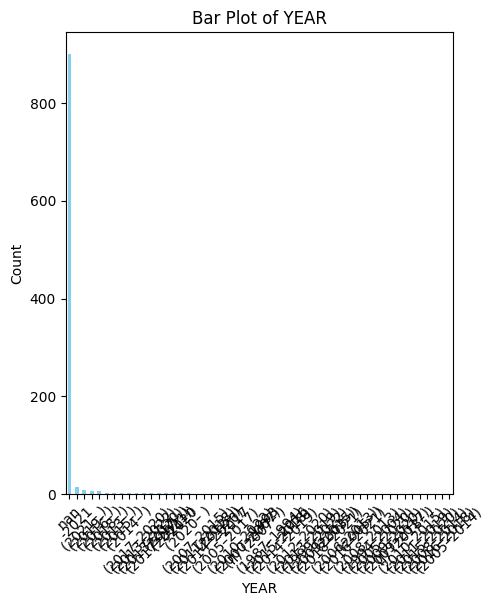

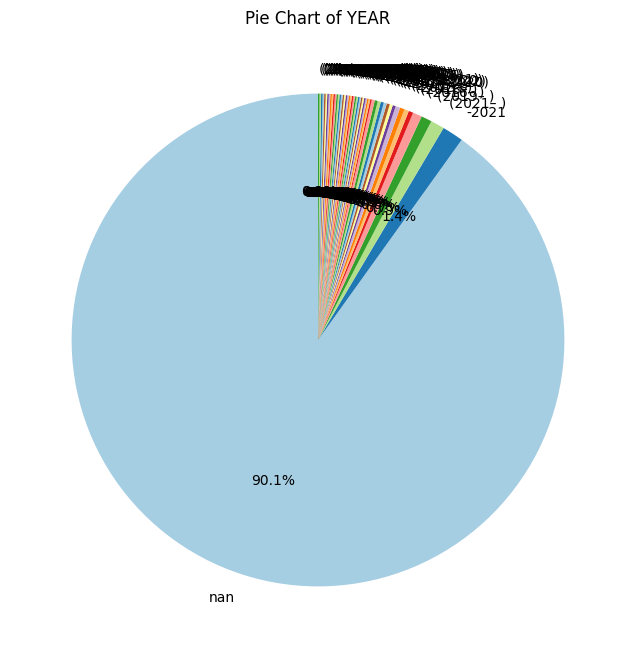


Univariate Analysis for GENRE:
Counts:
GENRE
nan                                           900
\nAction, Adventure, Drama                      7
\nAction, Crime, Drama                          6
\nDrama, Romance                                6
\nAnimation, Action, Adventure                  5
\nDrama                                         5
\nCrime, Drama, Thriller                        5
\nComedy                                        4
\nComedy, Drama                                 4
\nCrime, Drama, Mystery                         4
\nDrama, Horror, Mystery                        3
\nComedy, Drama, Romance                        3
\nComedy, Crime, Drama                          3
\nDrama, Fantasy, Horror                        3
\nComedy, Romance                               3
\nCrime, Drama                                  3
\nAction, Drama, History                        3
\nAction, Adventure, Crime                      3
\nDrama, Mystery, Sci-Fi                        2
\nAc

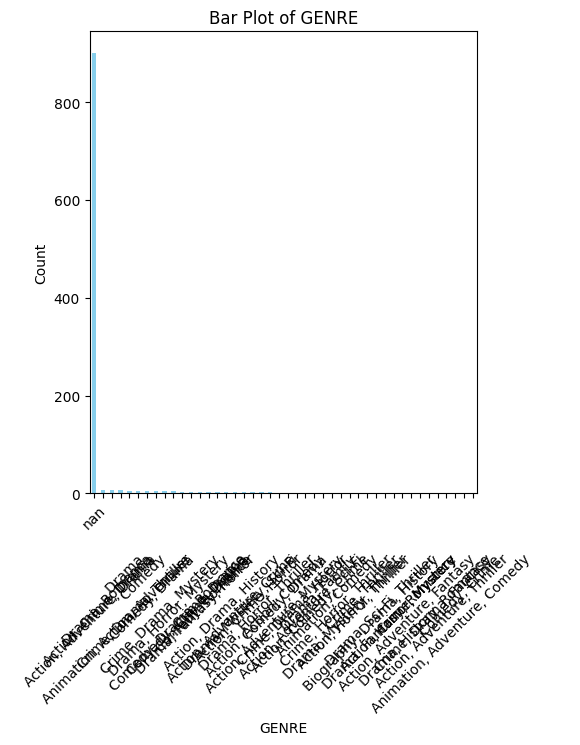

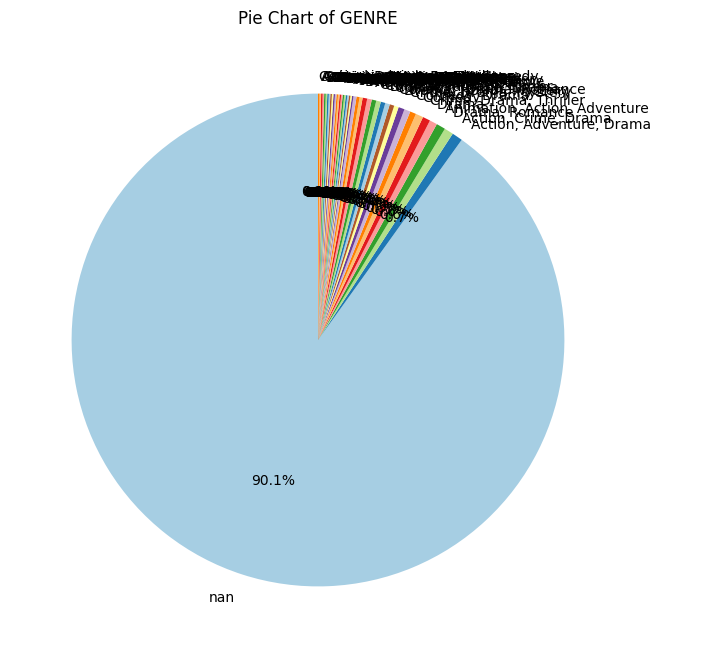

In [90]:
movies_df = pd.read_csv(path)
# Convert categorical columns to string type (if necessary)
movies_df['YEAR'] = movies_df['YEAR'].astype(str)
movies_df['GENRE'] = movies_df['GENRE'].astype(str)

# Define categorical columns
categorical_columns = ['YEAR', 'GENRE']

# Function to perform univariate analysis on categorical columns
def univariate_analysis_categorical(movies_df, column):
    print(f"\nUnivariate Analysis for {column}:")

    # Count of unique values
    counts = movies_df[column].value_counts()
    print("Counts:")
    print(counts)

    # Count percentage
    count_percent = (counts / counts.sum()) * 100
    print("\nCount Percentages:")
    print(count_percent)

    # Bar Plot
    plt.figure(figsize=(5, 6))
    counts.plot(kind='bar', color='skyblue')
    plt.title(f'Bar Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

    # Pie Chart
    plt.figure(figsize=(8, 8))
    counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    plt.title(f'Pie Chart of {column}')
    plt.ylabel('')  # Hide the y-label
    plt.show()

# Perform univariate analysis for each categorical column
for col in categorical_columns:
    univariate_analysis_categorical(movies_df, col)


Analysis of RATING:
Mean: 7.768085106382978
Median: 8.1
Standard Deviation: 1.074955639590594


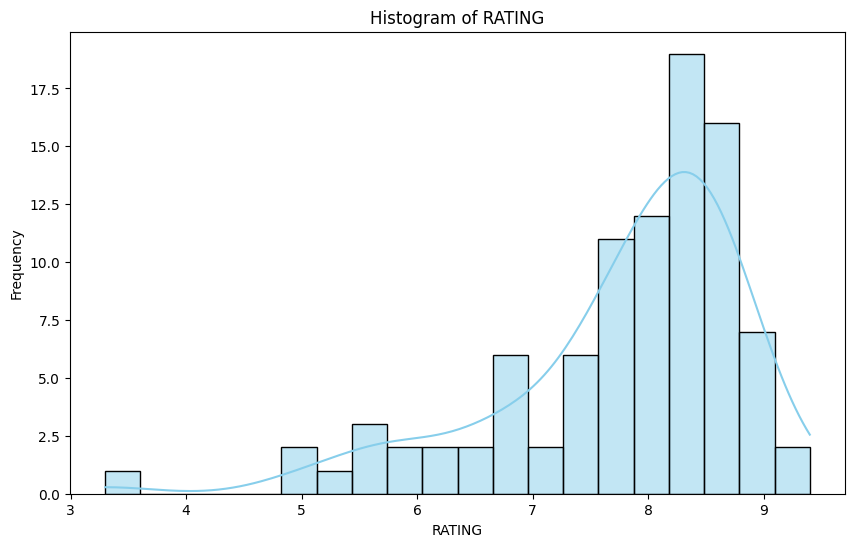

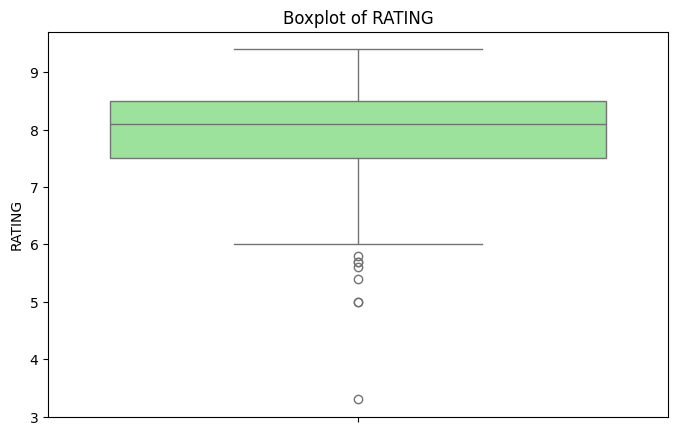


IQR Analysis for RATING:
Q1 (25th percentile): 7.5
Q3 (75th percentile): 8.5
IQR: 1.0
Lower bound for outliers: 6.0
Upper bound for outliers: 10.0
Number of outliers: 8


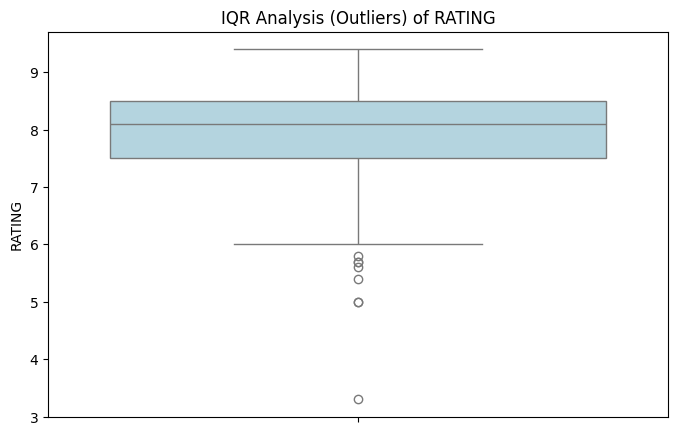

Outliers for RATING:
                                 MOVIES      YEAR  \
1   Masters of the Universe: Revelation  (2021– )   
25                            Chernobyl     -2021   
49                     Army of the Dead     -2021   
56                              365 dni     -2020   
63                Le dernier mercenaire     -2021   
64                       Resort to Love     -2021   
73               A Classic Horror Story     -2021   
96                         The Ice Road     -2021   

                                         GENRE  RATING  \
1   \nAnimation, Action, Adventure                 5.0   
25       \nDrama, History, Romance                 5.0   
49         \nAction, Crime, Horror                 5.8   
56                \nDrama, Romance                 3.3   
63                \nAction, Comedy                 5.4   
64               \nComedy, Romance                 5.7   
73        \nDrama, Horror, Mystery                 5.7   
96      \nAction, Adventure, Drama   

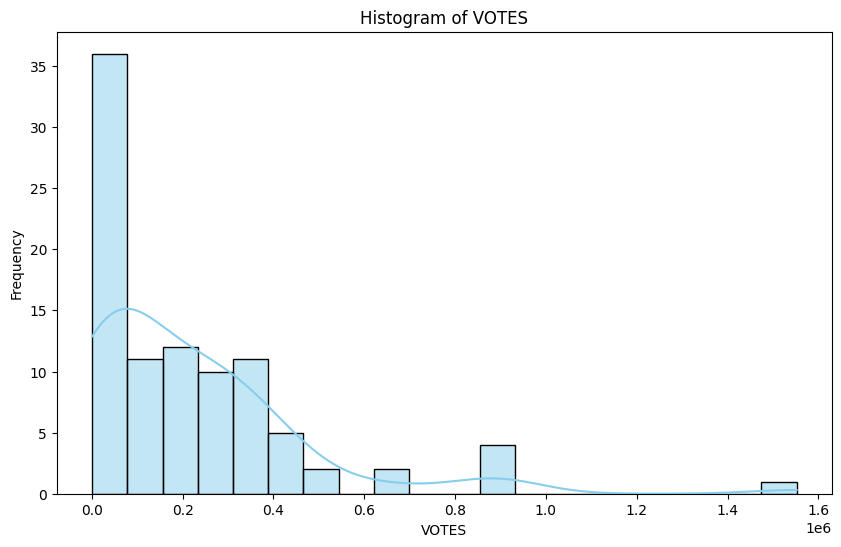

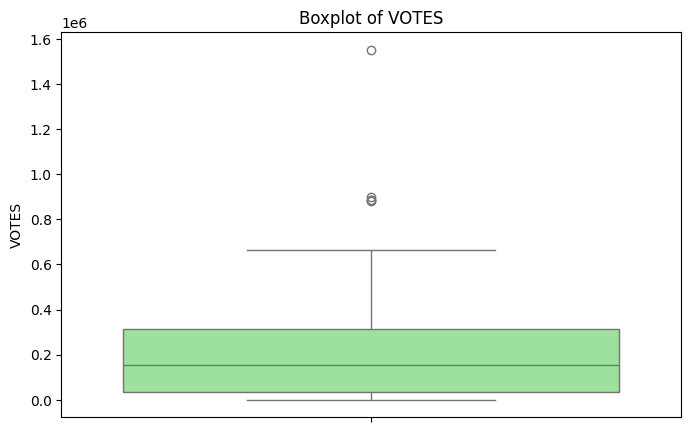


IQR Analysis for VOTES:
Q1 (25th percentile): 34624.0
Q3 (75th percentile): 312617.75
IQR: 277993.75
Lower bound for outliers: -382366.625
Upper bound for outliers: 729608.375
Number of outliers: 5


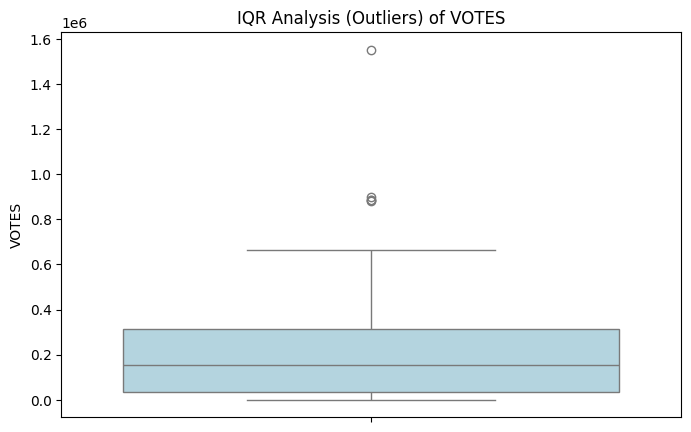

Outliers for VOTES:
              MOVIES         YEAR                                    GENRE  \
2   The Walking Dead  (2010–2022)    \nDrama, Horror, Thriller               
16      Breaking Bad  (2008–2013)     \nCrime, Drama, Thriller               
19   Stranger Things     (2016– )     \nDrama, Fantasy, Horror               
21           Friends  (1994–2004)            \nComedy, Romance               
85     Jurassic Park        -1993  \nAction, Adventure, Sci-Fi               

    RATING                                           ONE-LINE  \
2      8.2  \nSheriff Deputy Rick Grimes wakes up from a c...   
16     9.4  \nA high school chemistry teacher diagnosed wi...   
19     8.7  \nWhen a young boy disappears, his mother, a p...   
21     8.9  \nFollows the personal and professional lives ...   
85     8.1  \nA pragmatic paleontologist visiting an almos...   

                                                STARS      VOTES  RunTime  \
2   \n            \n    Stars:\nAndrew Linc

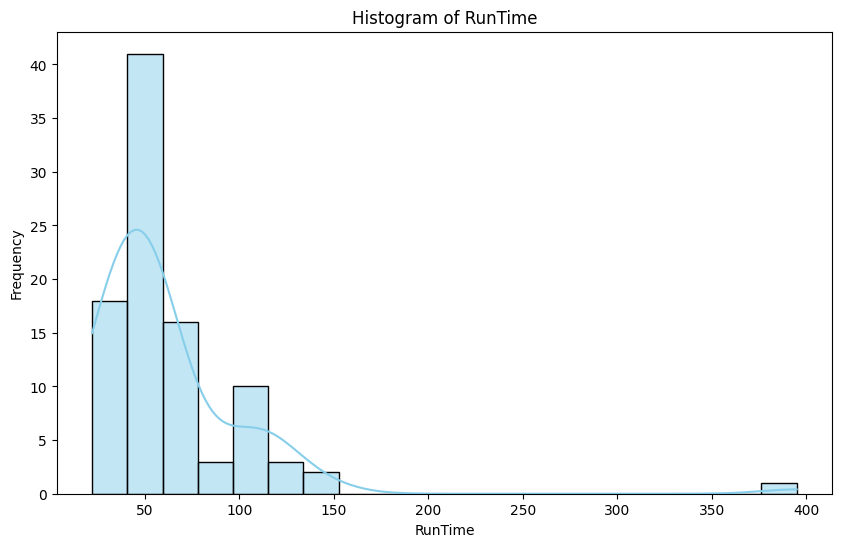

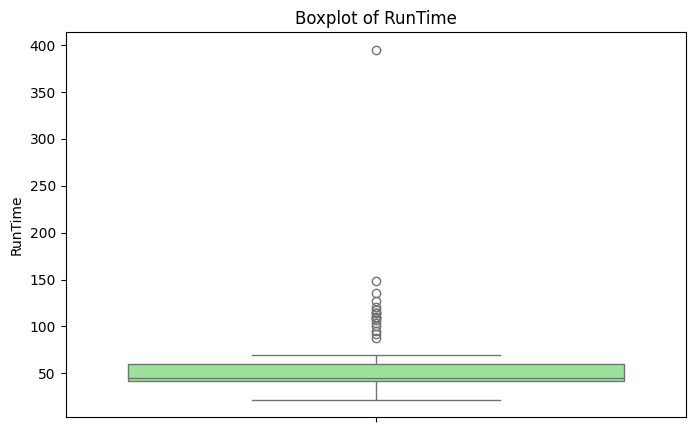


IQR Analysis for RunTime:
Q1 (25th percentile): 42.0
Q3 (75th percentile): 60.0
IQR: 18.0
Lower bound for outliers: 15.0
Upper bound for outliers: 87.0
Number of outliers: 19


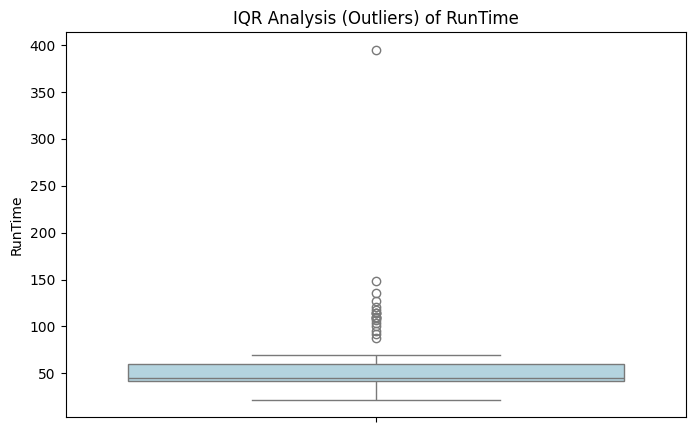

Outliers for RunTime:
                              MOVIES      YEAR  \
0                      Blood Red Sky     -2021   
6    The Last Letter from Your Lover     -2021   
10               Gunpowder Milkshake     -2021   
12                 Fear Street: 1994     -2021   
20                 Fear Street: 1978     -2021   
25                         Chernobyl     -2021   
30                 Fear Street: 1666     -2021   
49                  Army of the Dead     -2021   
56                           365 dni     -2020   
60                The Queen's Gambit     -2020   
63             Le dernier mercenaire     -2021   
64                    Resort to Love     -2021   
73            A Classic Horror Story     -2021   
77            The Hitman's Bodyguard     -2017   
83  Trollhunters: Rise of the Titans     -2021   
85                     Jurassic Park     -1993   
91                           Kingdom  (2019– )   
95                     Don't Breathe     -2016   
96                      The 

In [91]:
# Load the CSV file

movies_df = pd.read_csv(path)

# Convert 'RATING', 'VOTES', and 'RunTime' to numeric values (if these are the numerical columns in your dataset)
movies_df['RATING'] = pd.to_numeric(movies_df['RATING'], errors='coerce')
movies_df['VOTES'] = pd.to_numeric(movies_df['VOTES'].str.replace(',', ''), errors='coerce')
movies_df['RunTime'] = pd.to_numeric(movies_df['RunTime'], errors='coerce')

# Drop rows with missing values in numerical columns
movies_df = movies_df.dropna(subset=['RATING', 'VOTES', 'RunTime'])

# Univariate analysis of numerical attributes
numerical_columns = ['RATING', 'VOTES', 'RunTime']

# Define a function to perform univariate analysis for numerical columns
def univariate_analysis_numerical(movies_df, column):
    # Descriptive statistics
    mean_value = movies_df[column].mean()
    median_value = movies_df[column].median()
    std_dev = movies_df[column].std()

    print(f"\nAnalysis of {column}:")
    print(f"Mean: {mean_value}")
    print(f"Median: {median_value}")
    print(f"Standard Deviation: {std_dev}")

    # Histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(movies_df[column], bins=20, kde=True, color='skyblue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

    # Boxplot
    plt.figure(figsize=(8, 5))
    sns.boxplot(movies_df[column], color='lightgreen')
    plt.title(f'Boxplot of {column}')
    plt.show()

 # Function to perform IQR analysis and detect outliers
def iqr_analysis(movies_df, column):
    Q1 = movies_df[column].quantile(0.25)
    Q3 = movies_df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define outliers as points outside 1.5 times the IQR
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = movies_df[(movies_df[column] < lower_bound) | (movies_df[column] > upper_bound)]

    print(f"\nIQR Analysis for {column}:")
    print(f"Q1 (25th percentile): {Q1}")
    print(f"Q3 (75th percentile): {Q3}")
    print(f"IQR: {IQR}")
    print(f"Lower bound for outliers: {lower_bound}")
    print(f"Upper bound for outliers: {upper_bound}")
    print(f"Number of outliers: {outliers.shape[0]}")

    # Boxplot with outliers
    plt.figure(figsize=(8, 5))
    sns.boxplot(movies_df[column], color='lightblue')
    plt.title(f'IQR Analysis (Outliers) of {column}')
    plt.show()

    return outliers


# Perform univariate analysis for each numerical column
for column in numerical_columns:
    univariate_analysis_numerical(movies_df, column)
    outliers = iqr_analysis(movies_df, column)
    print(f"Outliers for {column}:")
    print(outliers)


Numerical vs Numerical Analysis:


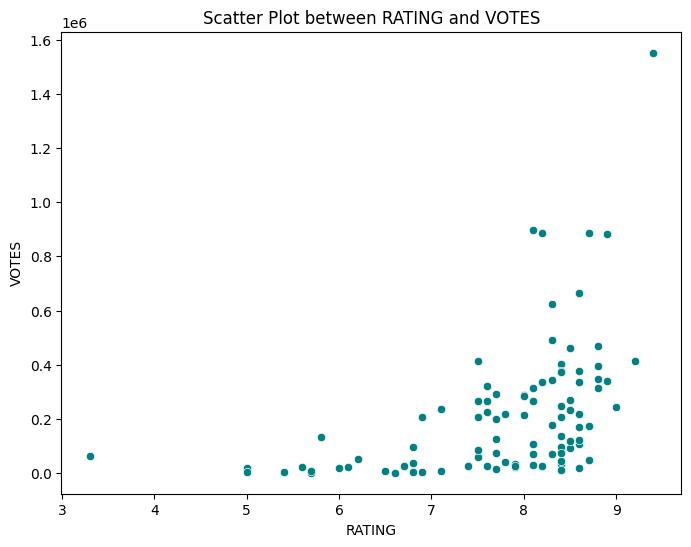

Correlation between RATING and VOTES: 0.4595


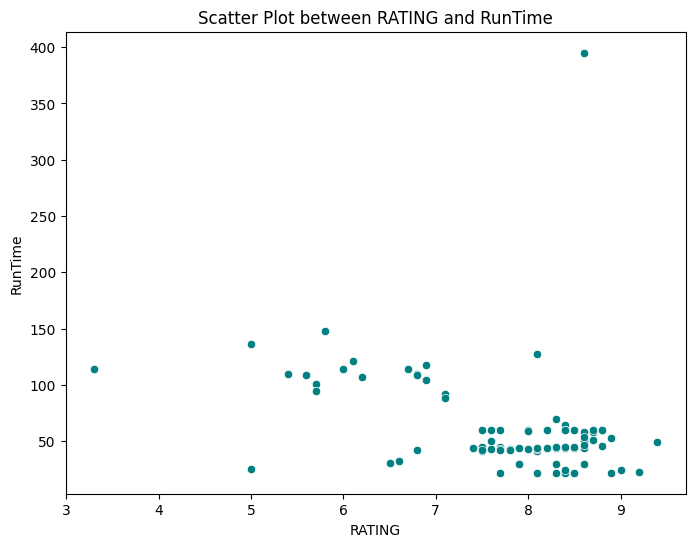

Correlation between RATING and RunTime: -0.3468


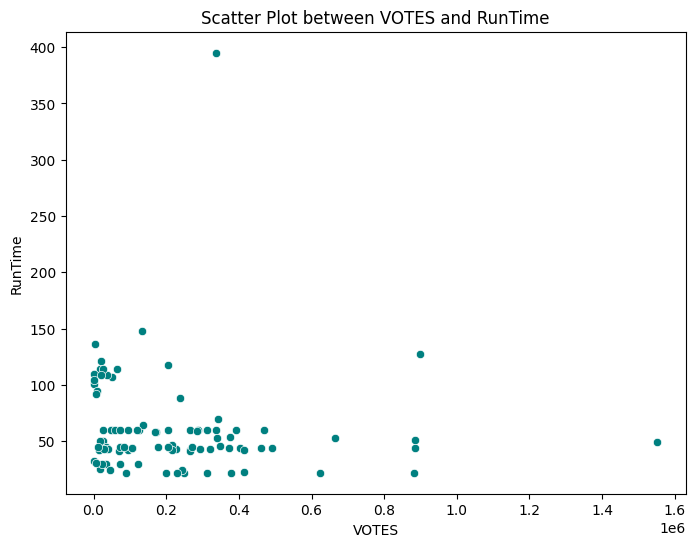

Correlation between VOTES and RunTime: -0.0850

Numerical vs Categorical Analysis:


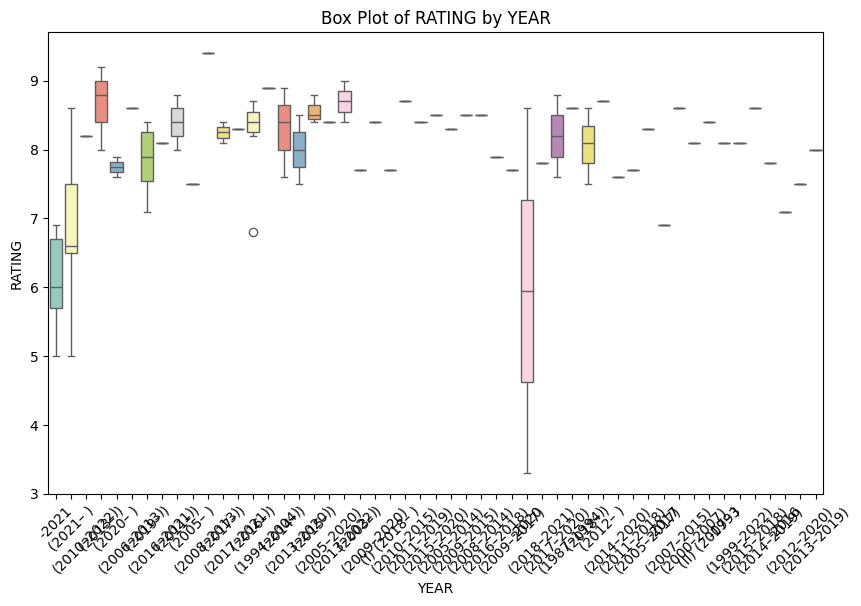

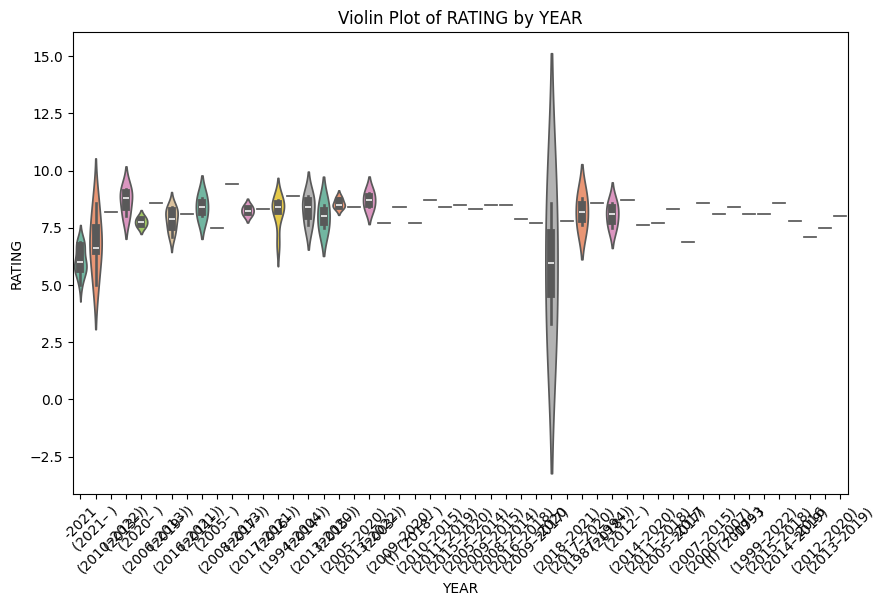

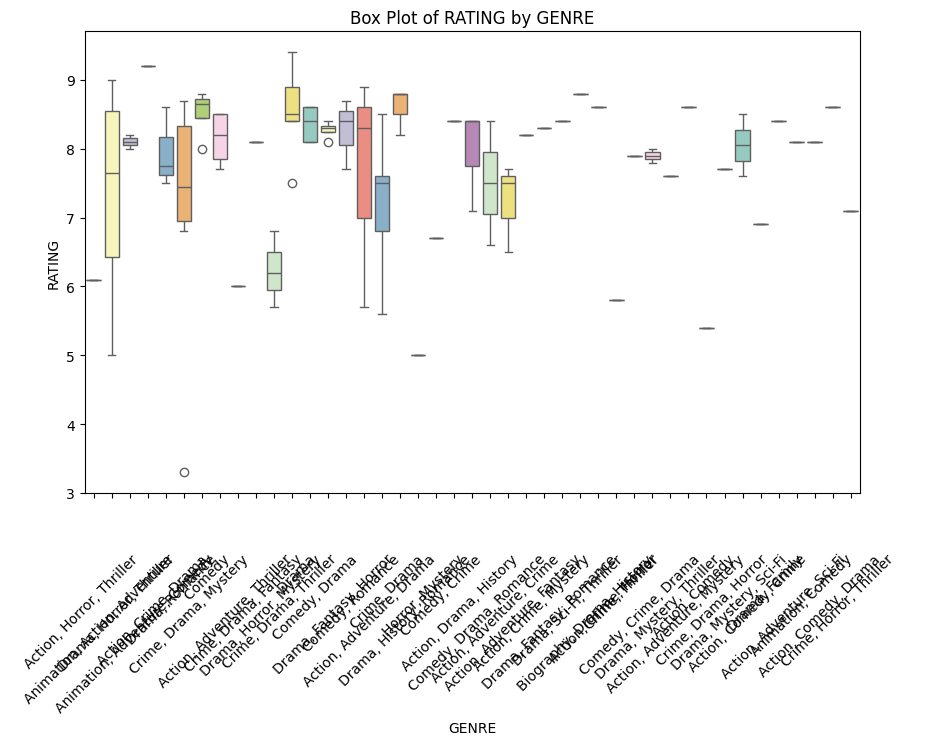

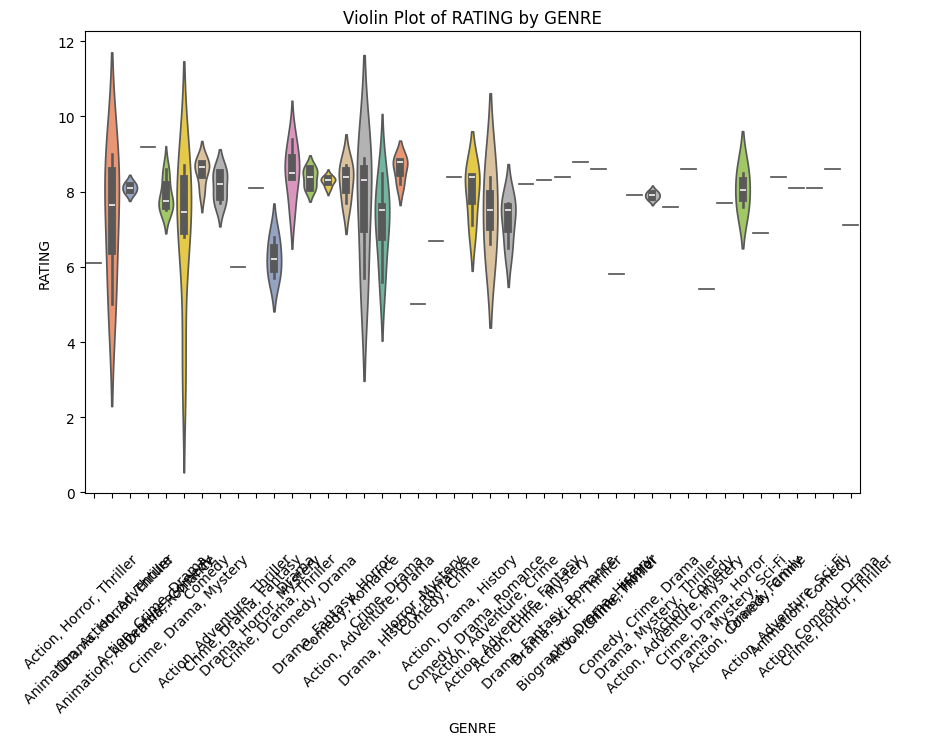

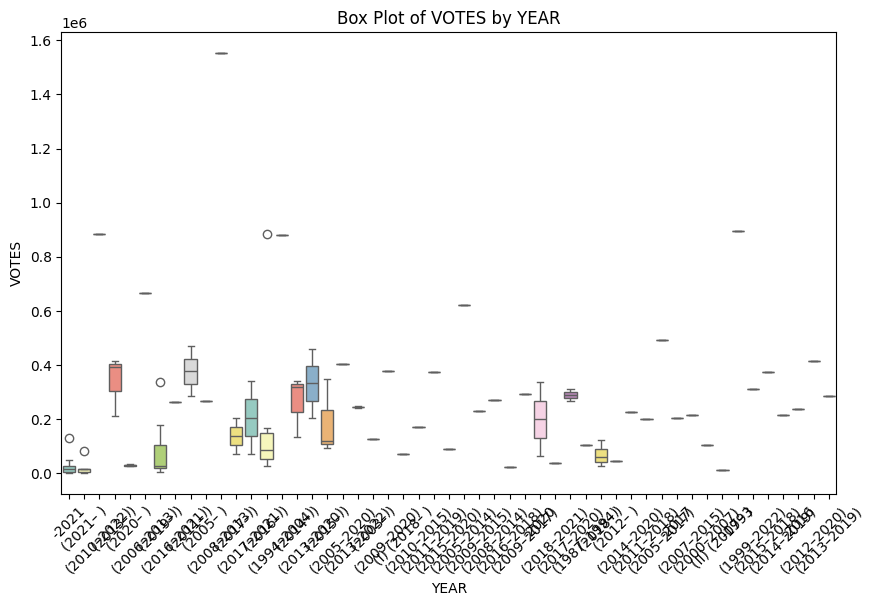

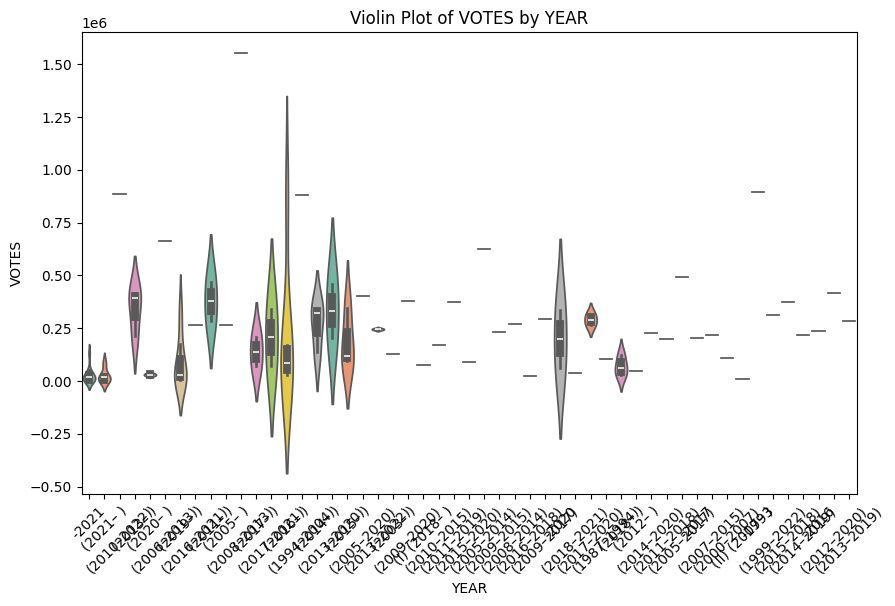

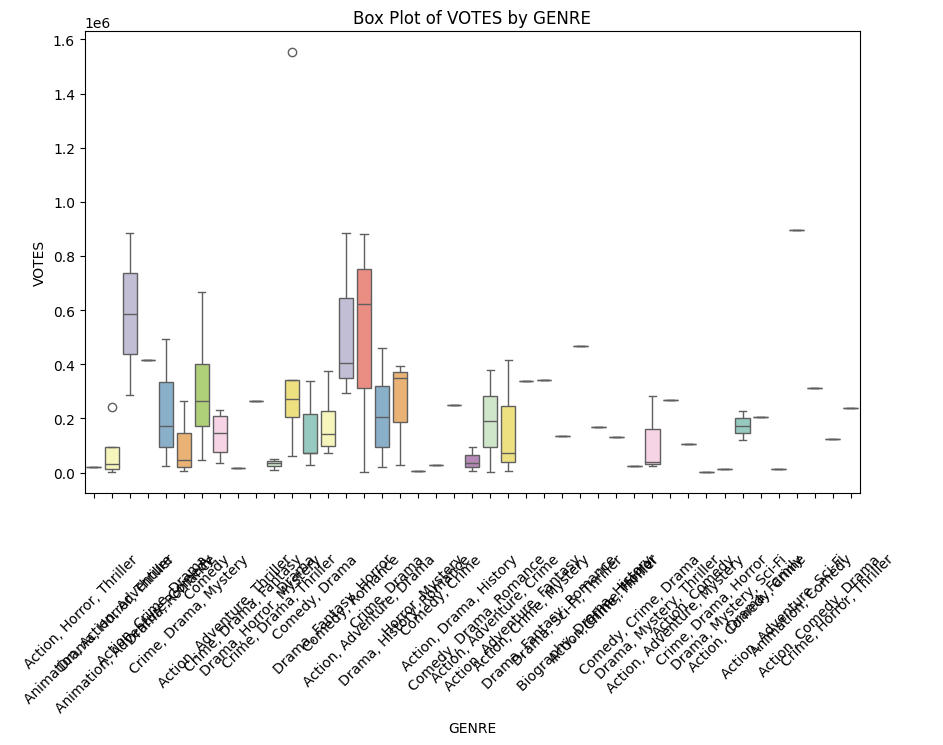

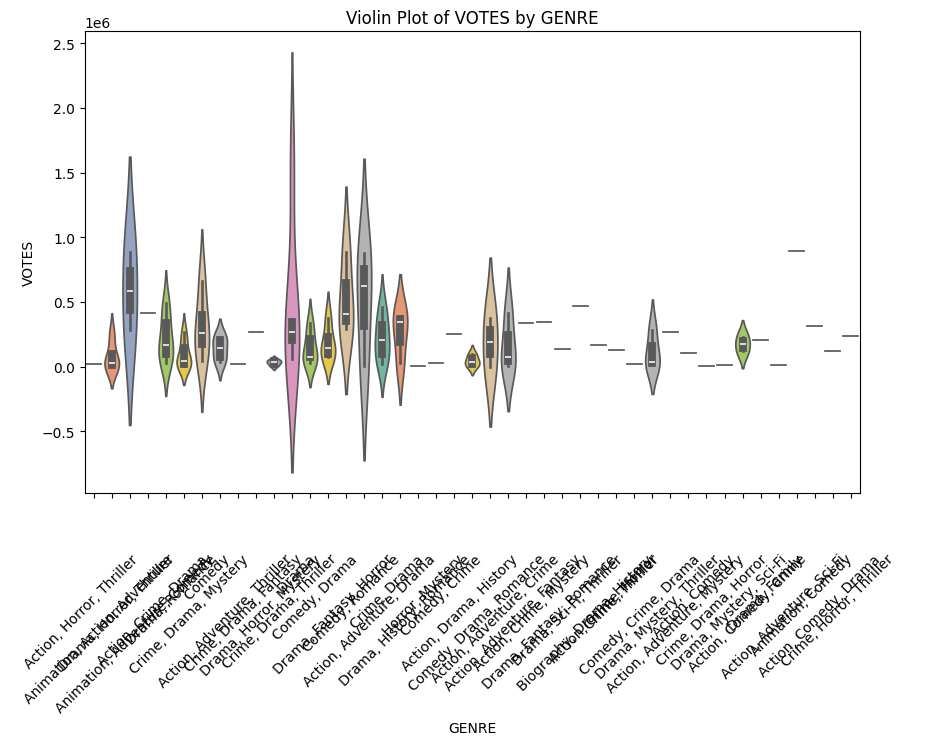

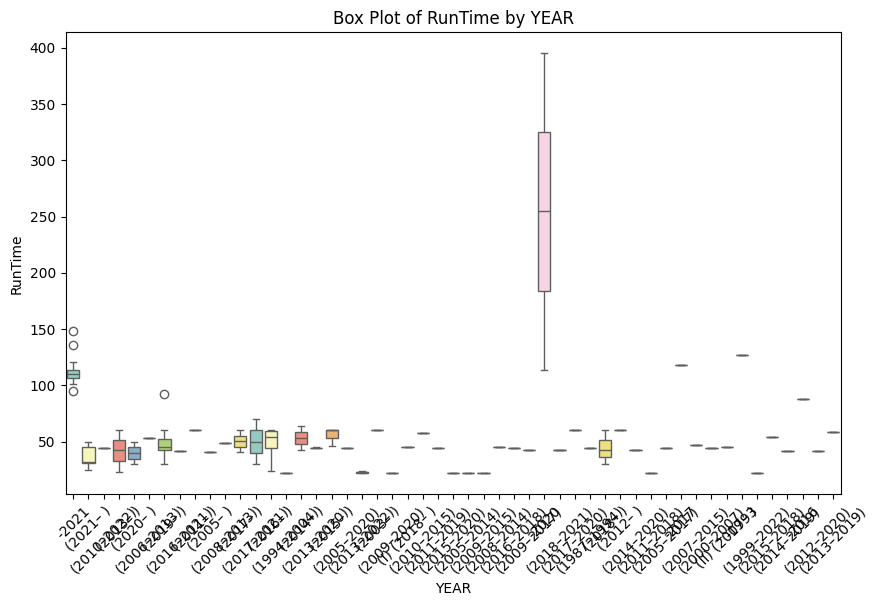

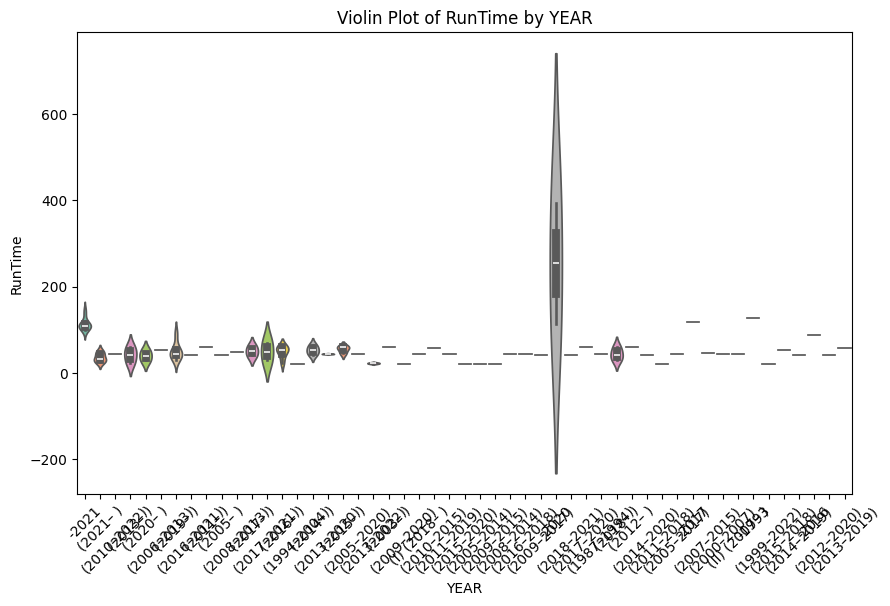

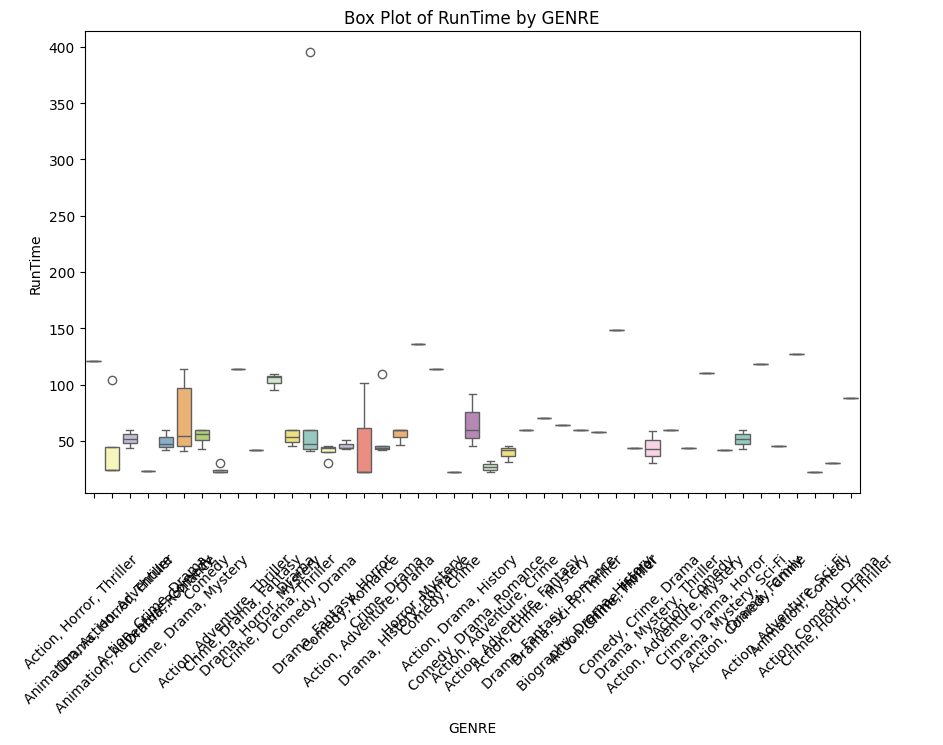

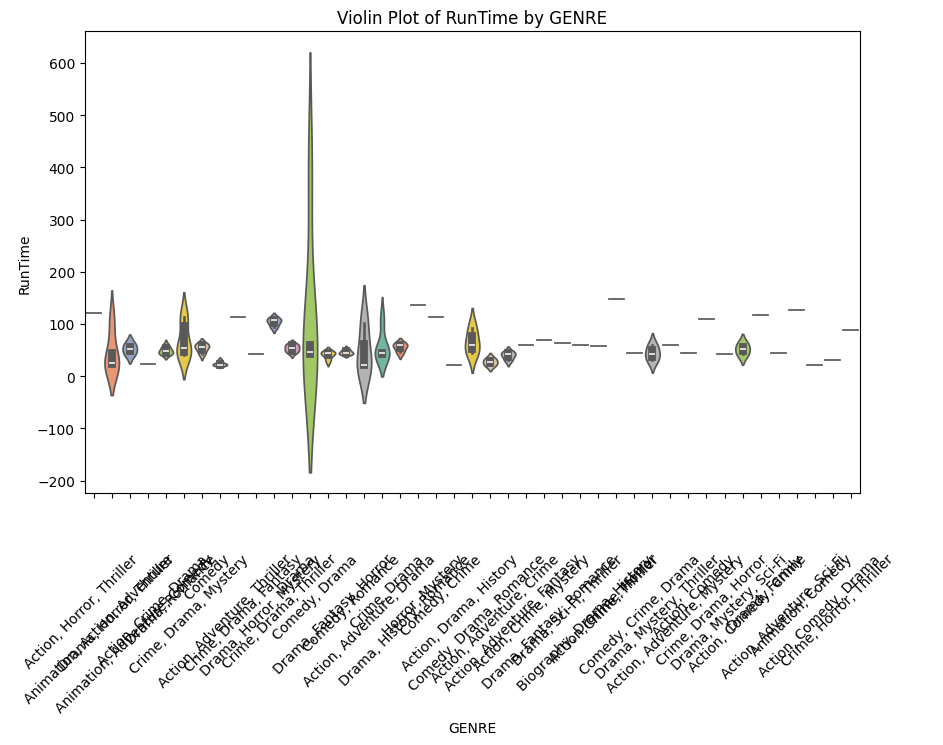


Categorical vs Categorical Analysis:
Cross-tabulation between YEAR and GENRE:
GENRE          \nAction, Adventure, Crime              \
YEAR                                                    
(1987–1994)                                         0   
(1994–2004)                                         0   
(1999–2022)                                         0   
(2000–2007)                                         0   
(2003– )                                            0   
(2005– )                                            0   
(2005–2014)                                         0   
(2005–2017)                                         0   
(2005–2020)                                         0   
(2006–2013)                                         0   
(2007–2015)                                         0   
(2008–2013)                                         0   
(2008–2014)                                         0   
(2009–2015)                                         0   
(2009–201

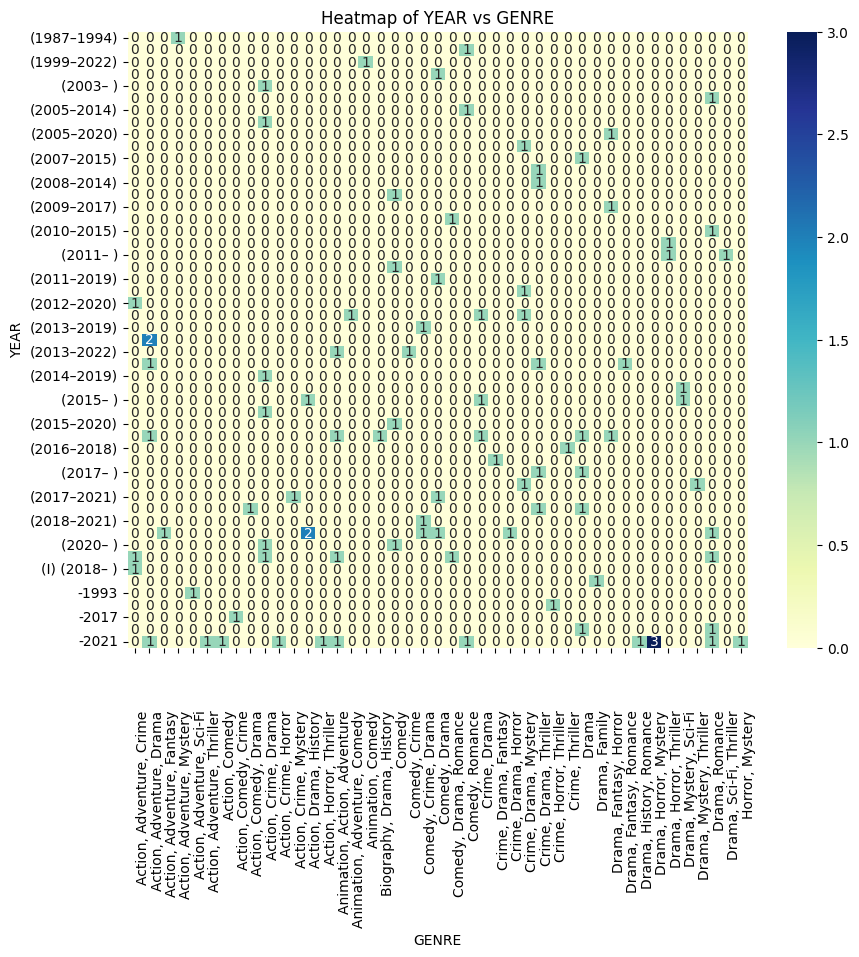

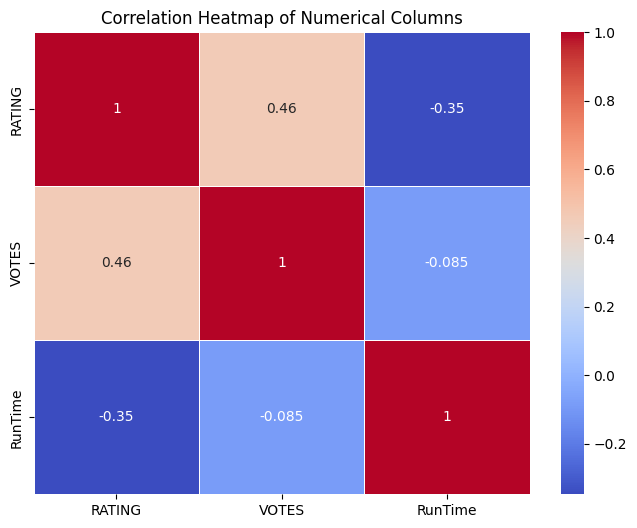

In [92]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")
# Clean the data (as done previously)
movies_df['RATING'] = pd.to_numeric(movies_df['RATING'], errors='coerce')
movies_df['RunTime'] = pd.to_numeric(movies_df['RunTime'], errors='coerce')
# Clean the VOTES column without using re
def clean_votes(votes):
    if isinstance(votes, str):
        return int(votes.replace(',', '').replace(' ', ''))  # Remove commas and spaces
    return votes  # Return as is if it's already an integer or NaN

# Apply the cleaning function
movies_df['VOTES'] = movies_df['VOTES'].apply(clean_votes)




# Drop rows with missing values in numerical columns
movies_df = movies_df.dropna(subset=['RATING', 'VOTES', 'RunTime'])

# Define numerical and categorical columns
numerical_columns = ['RATING', 'VOTES', 'RunTime']
categorical_columns = ['YEAR', 'GENRE']

# 1. Numerical vs Numerical Bivariate Analysis (Scatter Plots & Correlation)
def numerical_vs_numerical(movies_df, numerical_columns):
    print("\nNumerical vs Numerical Analysis:")
    for i in range(len(numerical_columns)):
        for j in range(i + 1, len(numerical_columns)):
            col1, col2 = numerical_columns[i], numerical_columns[j]
            # Scatter plot
            plt.figure(figsize=(8, 6))
            sns.scatterplot(x=movies_df[col1], y=movies_df[col2], color='teal')
            plt.title(f'Scatter Plot between {col1} and {col2}')
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.show()

            # Correlation
            correlation = movies_df[col1].corr(movies_df[col2])
            print(f"Correlation between {col1} and {col2}: {correlation:.4f}")

# 2. Numerical vs Categorical Bivariate Analysis (Box Plots & Violin Plots)
def numerical_vs_categorical(movies_df, numerical_columns, categorical_columns):
    print("\nNumerical vs Categorical Analysis:")
    for num_col in numerical_columns:
        for cat_col in categorical_columns:
            # Box plot
            plt.figure(figsize=(10, 6))
            sns.boxplot(x=movies_df[cat_col], y=movies_df[num_col], palette="Set3")
            plt.title(f'Box Plot of {num_col} by {cat_col}')
            plt.xticks(rotation=45)
            plt.ylabel(num_col)
            plt.show()

            # Violin plot
            plt.figure(figsize=(10, 6))
            sns.violinplot(x=movies_df[cat_col], y=movies_df[num_col], palette="Set2")
            plt.title(f'Violin Plot of {num_col} by {cat_col}')
            plt.xticks(rotation=45)
            plt.ylabel(num_col)
            plt.show()
# 3. Categorical vs Categorical Bivariate Analysis (Cross-tab & Heatmap)
def categorical_vs_categorical(movies_df, categorical_columns):
    print("\nCategorical vs Categorical Analysis:")
    for i in range(len(categorical_columns)):
        for j in range(i + 1, len(categorical_columns)):
            cat1, cat2 = categorical_columns[i], categorical_columns[j]
            # Cross-tabulation
            cross_tab = pd.crosstab(movies_df[cat1], movies_df[cat2])
            print(f"Cross-tabulation between {cat1} and {cat2}:\n{cross_tab}")

            # Heatmap
            plt.figure(figsize=(10, 8))
            sns.heatmap(cross_tab, annot=True, cmap="YlGnBu", fmt="d")
            plt.title(f'Heatmap of {cat1} vs {cat2}')
            plt.ylabel(cat1)
            plt.xlabel(cat2)
            plt.show()


# 4. Correlation Heatmap (for all numerical columns)
def correlation_heatmap(movies_df, numerical_columns):
    correlation_matrix = movies_df[numerical_columns].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
    plt.title('Correlation Heatmap of Numerical Columns')
    plt.show()

# Run all bivariate analysis
numerical_vs_numerical(movies_df, numerical_columns)
numerical_vs_categorical(movies_df, numerical_columns, categorical_columns)
categorical_vs_categorical(movies_df, categorical_columns)
correlation_heatmap(movies_df, numerical_columns)